In [4]:
import os
from os.path import isdir, join
from pathlib import Path
import pandas as pd

# Math
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa

from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd

%matplotlib inline

In [6]:
train_audio_path = '../input/train/audio/'
filename = '/yes/0a7c2a8d_nohash_0.wav'
sample_rate, samples = wavfile.read(str(train_audio_path) + filename)

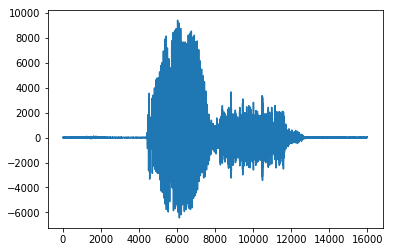

In [9]:
plt.plot(samples)

# Voice activity detection example 
https://www.kaggle.com/holzner/voice-activity-detection-example

In [1]:
import os
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

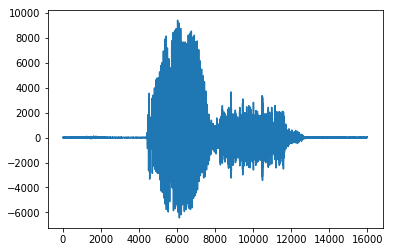

In [7]:
train_audio_path = "../input/train/audio"
filename = 'yes/0a7c2a8d_nohash_0.wav'
from scipy.io import wavfile
sample_rate, samples = wavfile.read(os.path.join(train_audio_path, filename))
plt.plot(samples)

In [8]:
import webrtcvad
vad = webrtcvad.Vad()

# set aggressiveness from 0 to 3
vad.set_mode(3)

import struct
raw_samples = struct.pack("%dh" % len(samples), *samples)

window_duration = 0.03 # duration in seconds

samples_per_window = int(window_duration * sample_rate + 0.5)

bytes_per_sample = 2

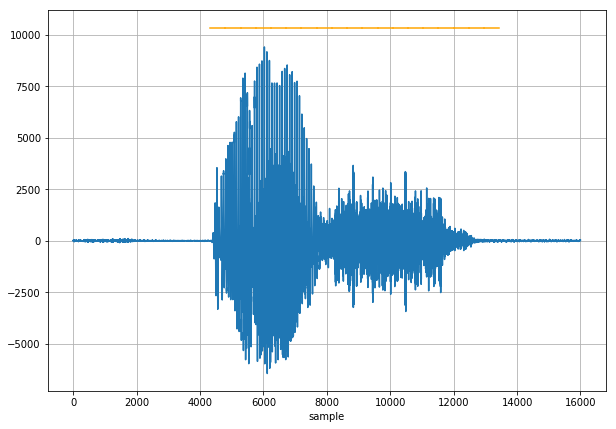

In [9]:
segments = []

for start in np.arange(0, len(samples), samples_per_window):
    stop = min(start + samples_per_window, len(samples))
    
    is_speech = vad.is_speech(raw_samples[start * bytes_per_sample: stop * bytes_per_sample], 
                              sample_rate = sample_rate)

    segments.append(dict(
       start = start,
       stop = stop,
       is_speech = is_speech))
    
plt.figure(figsize = (10,7))
plt.plot(samples)

ymax = max(samples)

# plot segment identifed as speech
for segment in segments:
    if segment['is_speech']:
        plt.plot([ segment['start'], segment['stop'] - 1], [ymax * 1.1, ymax * 1.1], color = 'orange')

plt.xlabel('sample')
plt.grid()

In [10]:
speech_samples = np.concatenate([ samples[segment['start']:segment['stop']] for segment in segments if segment['is_speech']])

import IPython.display as ipd
ipd.Audio(speech_samples, rate=sample_rate)

In [ ]:
https://arxiv.org/pdf/1611.09405.pdf